<a href="https://colab.research.google.com/github/annisanurrahma/Pemrograman_Python/blob/main/Tugas_Pemograman_Python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [168]:
ls

dataset2/  nndataset/  Tugas_Pemograman_Python.ipynb  Untitled0.ipynb


In [169]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os 

In [170]:
print("[INFO] Loading Gambar...")
imagePaths = paths.list_images("dataset2")
data = []
labels = []

[INFO] Loading Gambar...


In [171]:
for imagePath in imagePaths:
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)
  label = imagePath.split(os.path.sep)[-2]  
  labels.append(label)

In [173]:
print(labels)

['GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10',

In [174]:
lb = LabelBinarizer()
labels  = lb.fit_transform(labels)

In [175]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [176]:
(trainX, testX, trainY,  testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(440, 64, 64, 3)
(147, 64, 64, 3)


In [177]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16,1,1, activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32,1,1, activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        544       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               819300    
_________________________________________________________________
dense_43 (Dense)             (None, 5)               

In [178]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 52ms/step - loss: 1.6808 - accuracy: 0.2091 - val_loss: 1.6032 - val_accuracy: 0.1633
Epoch 2/25
14/14 [==============================] - 1s 45ms/step - loss: 1.5846 - accuracy: 0.2386 - val_loss: 1.5680 - val_accuracy: 0.1633
Epoch 3/25
14/14 [==============================] - 1s 45ms/step - loss: 1.5500 - accuracy: 0.2773 - val_loss: 1.5556 - val_accuracy: 0.2245
Epoch 4/25
14/14 [==============================] - 1s 43ms/step - loss: 1.4928 - accuracy: 0.4182 - val_loss: 1.4680 - val_accuracy: 0.3878
Epoch 5/25
14/14 [==============================] - 1s 43ms/step - loss: 1.3964 - accuracy: 0.4545 - val_loss: 1.3384 - val_accuracy: 0.5374
Epoch 6/25
14/14 [==============================] - 1s 45ms/step - loss: 1.3118 - accuracy: 0.4614 - val_loss: 1.2268 - val_accuracy: 0.6190
Epoch 7/25
14/14 [==============================] - 1s 42ms/step - loss: 1.2048 - accuracy: 0.5182 - val_loss: 1.1455 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


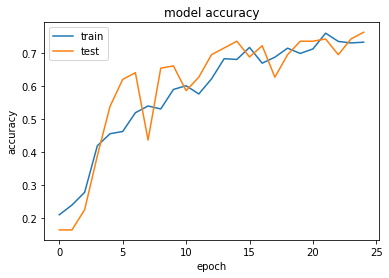

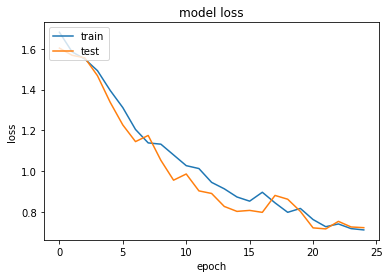

In [180]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [181]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.67      0.92      0.77        24
      GMB_05       0.86      0.50      0.63        24
      GMB_06       0.77      0.59      0.67        29
      GMB_09       0.84      0.86      0.85        36
      GMB_10       0.73      0.88      0.80        34

    accuracy                           0.76       147
   macro avg       0.77      0.75      0.74       147
weighted avg       0.78      0.76      0.75       147



In [182]:
model1.save('nndataset')

INFO:tensorflow:Assets written to: nndataset/assets
